<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/finalcitra_H071201091_ufairah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# final citra

nama: ufairah damara bashir
<br>Nim: H071201091

library

In [ ]:
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image
import pandas as pd

from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

In [ ]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

mount to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Hilangkan noise periodik pada gambar lena_priodic2.bmp

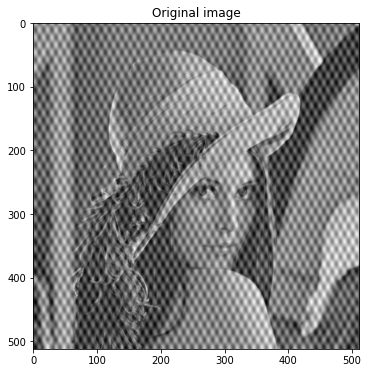

In [ ]:
image = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/finalcitra/lena_priodic2.bmp',0)

plt.figure(figsize = (10,6))
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()

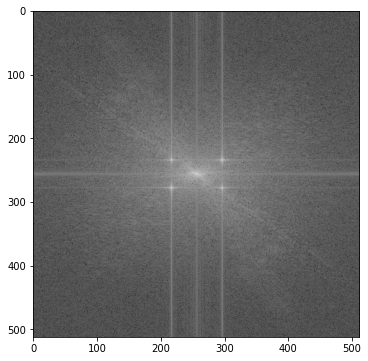

In [ ]:
IM = np.fft.fft2(image)
IMs = np.fft.fftshift(IM)

plt.figure(figsize = (10,6))
plt.imshow(np.log(1+np.absolute(IMs)), cmap = 'gray')
plt.show()

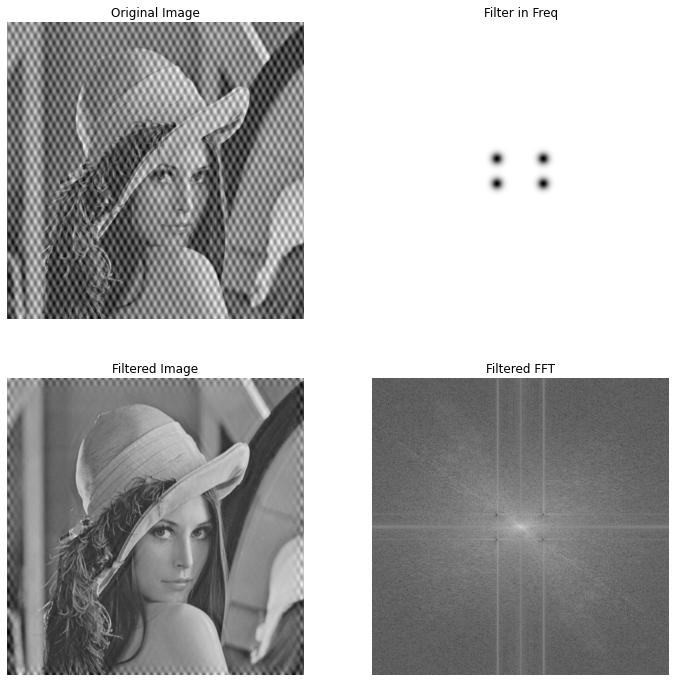

In [ ]:
N = IMs.shape[0]
x, y = np.meshgrid(np.arange(N), np.arange(N))

a1 = 0.01
a2 = 0.01

NF1 = 1 - np.exp(-a1*(x-215)**2 - a2*(y-235)**2) # Gaussian
NF2 = 1 - np.exp(-a1*(x-215)**2 - a2*(y-278)**2) # Gaussian
NF3 = 1 - np.exp(-a1*(x-295)**2 - a2*(y-235)**2) # Gaussian
NF4 = 1 - np.exp(-a1*(x-295)**2 - a2*(y-278)**2) # Gaussian

Z = NF1*NF2*NF3*NF4
IMFs = IMs*Z

IMFr = np.fft.ifftshift(IMFs)
imfr = np.fft.ifft2(IMFr)

plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Filter in Freq')
plt.imshow(np.log(1+np.absolute(Z)), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Filtered Image')
plt.imshow(np.real(imfr), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Filtered FFT')
plt.imshow(np.log(1+np.absolute(IMFs)), cmap = 'gray')
plt.axis('off')

plt.show()

2. Lakukan deteksi tepi menggunakan operator Prewitt pada citra phone_noise.png dengan terlebih
dahulu memproses median filter pada citra tersebut.

Text(0.5, 1.0, 'median filter phone')

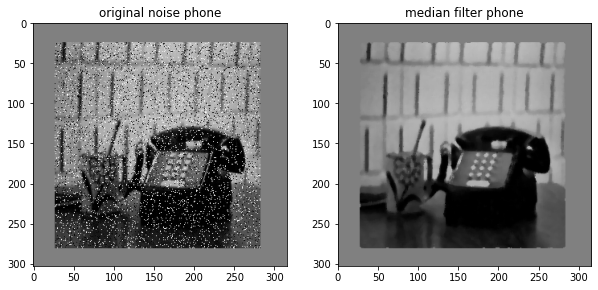

In [ ]:
#median filter

phonen = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/finalcitra/phone_noise.png')

mphone =  cv2.medianBlur(phonen,5)

f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(phonen, cmap='gray')
ax[0].set_title("original noise phone")

ax[1].imshow(mphone, cmap='gray')
ax[1].set_title("median filter phone")

In [ ]:
#deteksi tepi operator prewit

#Prewit
kx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
ky = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

#phone
imgx = cv2.filter2D(mphone, -1, kx)
imgy = cv2.filter2D(mphone, -1, ky)
pphone = imgx + imgy

Text(0.5, 1.0, 'operator prewit')

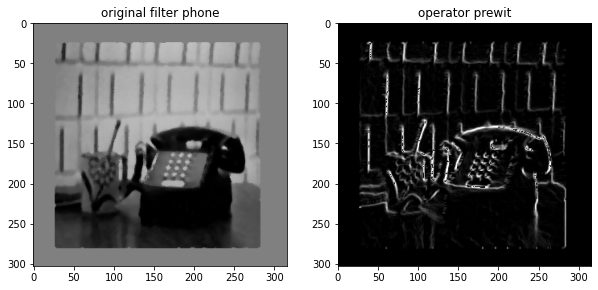

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(mphone, cmap='gray')
ax[0].set_title("original filter phone")

ax[1].imshow(pphone, cmap='gray')
ax[1].set_title("operator prewit")

3. Hilangkan semua bagian yang berlubang pada citra coins-binary.png

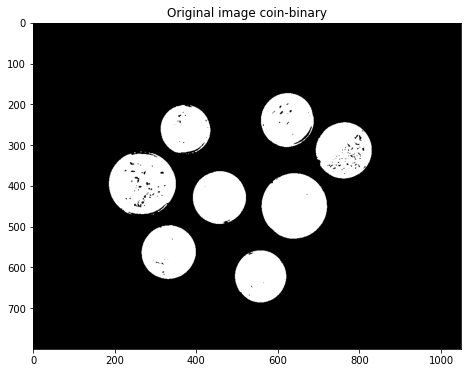

In [ ]:
coin = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/finalcitra/coins-binary.png',0)

plt.figure(figsize = (10,6))
plt.imshow(coin, cmap = 'gray')
plt.title('Original image coin-binary')
plt.show()

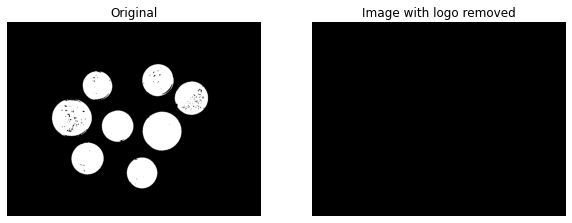

In [ ]:
# inisialisasi mask
mask = np.zeros(coin.shape[:-1])

# atur pixel yang akan dihilangkan menjadi satu. di sini saya pilih y700 sampai
# y100 untuk dihilangkan
mask[100:780] = 1


# gunakan inpaint
image_logo_removed = inpaint.inpaint_biharmonic(coin,
                                                mask,
                                                multichannel=True)

# tampilkan dua gambar berbeda
plot_comparison(coin, image_logo_removed, 'Image with logo removed')

4. Segmentasi citra lena_color.tif menggunakan K-Mean clustering dengan k=3

(262144, 3)


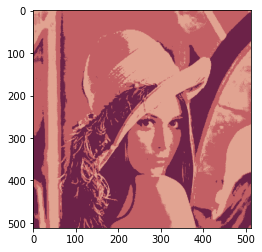

In [ ]:
lena = cv2.imread("/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/finalcitra/lena-color.tif")

#ubah warna ke format rgb
lenaa = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape gambar ke array 2d (RGB)
lena_pv = image.reshape((-1, 3))
lena_pv = np.float32(lena_pv)

print(lena_pv.shape)

# definsikan iterasi misalkan 100 dan nilai epsilon 0.2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#angka k-means anggap saja 3
k = 3
_, labels, (centers) = cv2.kmeans(lena_pv, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert kembali ke 8 bit values
centers = np.uint8(centers)

labels = labels.flatten()

# convert semua pixel ke warna centroids
segmented_image = centers[labels.flatten()]

# reshape kembali dimensi gambar ori
segmented_image = segmented_image.reshape(image.shape)

# show the image
plt.imshow(segmented_image)
plt.show()